
# Gráficos

Metamos los gráficos que necesitamos en esta notebook

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import contrastes
import seaborn as sns
import pymongo 

database_name = "contrastes"
client = pymongo.MongoClient('localhost', 27017)
db = client[database_name]

collection = db.tweets



In [2]:
users = collection.distinct("user_id")

len(users)

56308

In [3]:
counts = np.array([collection.find({"user_id": user_id}).count() for user_id in users])
    

In [4]:
%%time
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(
    preserve_case=False,
    reduce_len=True,
)

len_counts = []

for tweet in db.tweets.find().limit(int(10e6)):
    tokens = tokenizer.tokenize(tweet['text'])
    len_counts.append(len(tokens))

CPU times: user 8min 32s, sys: 5.42 s, total: 8min 38s
Wall time: 8min 46s


In [57]:
tweet_lens = np.array(len_counts)

In [58]:
tweet_lens = tweet_lens[tweet_lens < 50]

Text(0,0.5,'Number of tweets')

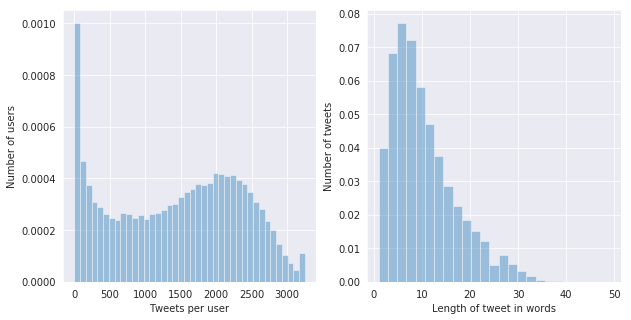

In [68]:
sns.set_style("dark")
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(counts, norm_hist=True, kde=False)
g.grid(True)

g.set_xlabel("Tweets per user")
g.set_ylabel("Number of users")

plt.subplot(1, 2, 2)

g = sns.distplot(tweet_lens, norm_hist=True, kde=False, bins=25)

g.grid(True)

g.set_xlabel("Length of tweet in words")
g.set_ylabel("Number of tweets")

In [69]:
fig.savefig("../output/figures/dataset_histograms.png")